In [1]:
medical_charges_url = 'https://raw.githubusercontent.com/JovianML/opendatasets/master/data/medical-charges.csv'

In [2]:
from urllib.request import urlretrieve
urlretrieve(medical_charges_url, 'medical.csv')

('medical.csv', <http.client.HTTPMessage at 0x181522f8e10>)

In [3]:
!pip install pandas --quiet


[notice] A new release of pip is available: 23.0.1 -> 26.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import pandas as pd
medical_df = pd.read_csv('medical.csv')

In [5]:
medical_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [6]:
medical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
medical_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [8]:
!pip install matplotlib seaborn --quiet


[notice] A new release of pip is available: 23.0.1 -> 26.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [9]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [10]:
medical_df.age.describe()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

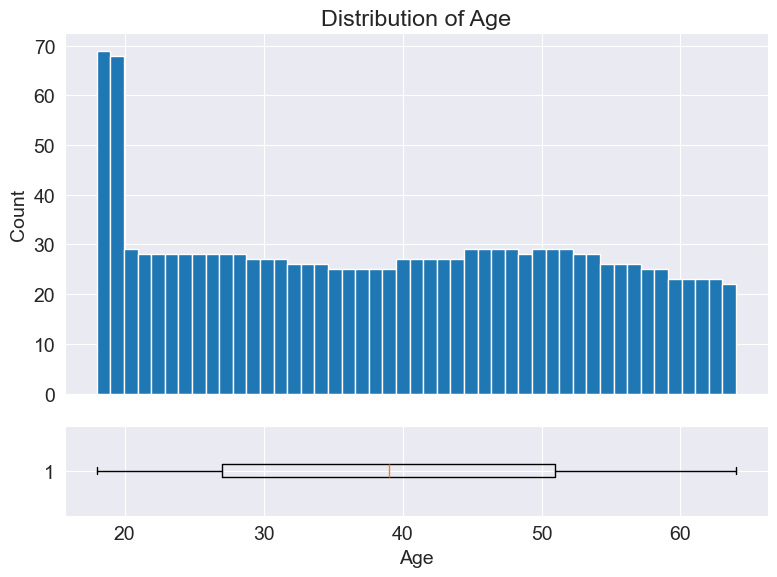

In [11]:
ages = medical_df['age']

fig, (ax_hist, ax_box) = plt.subplots(
    2, 1,
    figsize=(8, 6),
    sharex=True,
    gridspec_kw={'height_ratios': [4, 1]}
)

# Histogram
ax_hist.hist(ages, bins=47)
ax_hist.set_title('Distribution of Age')
ax_hist.set_ylabel('Count')

# Boxplot
ax_box.boxplot(ages, vert=False)
ax_box.set_xlabel('Age')

plt.tight_layout()
plt.show()

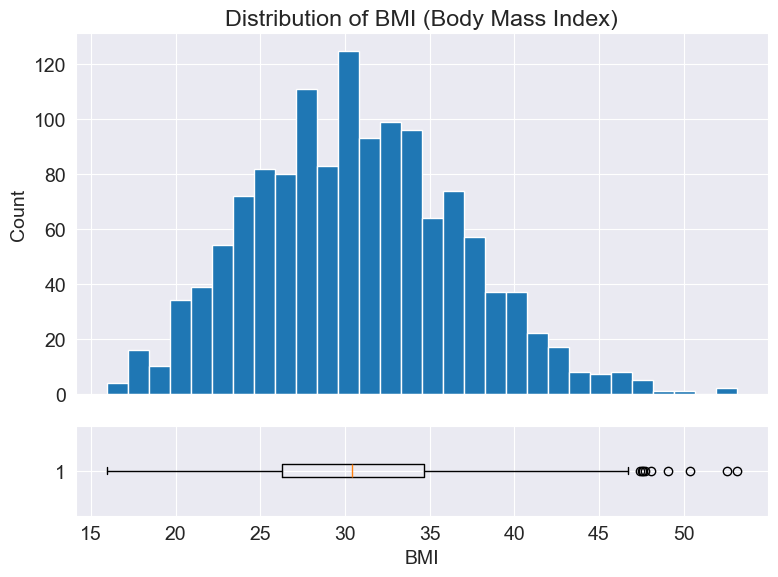

In [12]:

bmi = medical_df['bmi']

fig, (ax_hist, ax_box) = plt.subplots(
    2, 1,
    figsize=(8, 6),
    sharex=True,
    gridspec_kw={'height_ratios': [4, 1]}
)

# Histogram
ax_hist.hist(bmi, bins=30)
ax_hist.set_title('Distribution of BMI (Body Mass Index)')
ax_hist.set_ylabel('Count')

# Boxplot
ax_box.boxplot(bmi, vert=False)
ax_box.set_xlabel('BMI')

plt.tight_layout()
plt.show()

C:\Users\mitta\AppData\Local\Temp\ipykernel_20500\83948911.py:21: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax_box.boxplot(


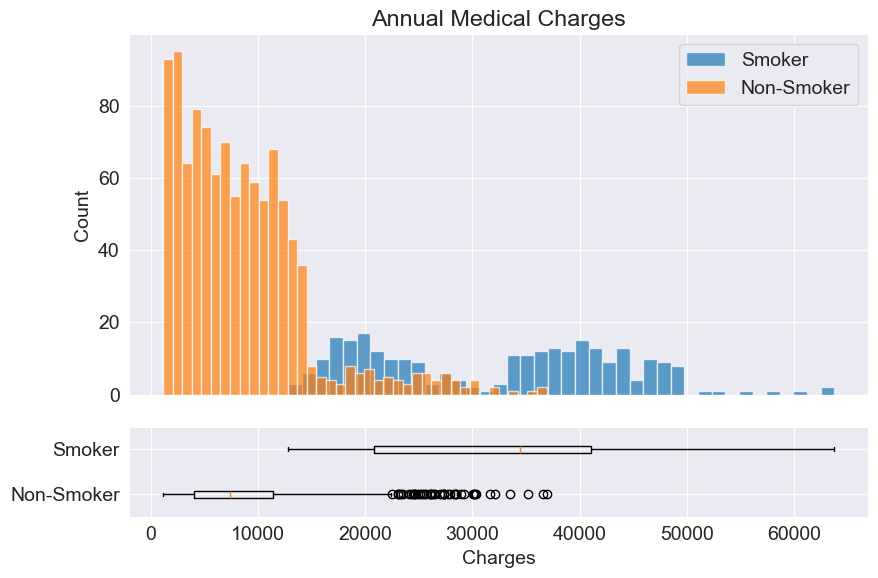

In [13]:

# Split data by smoker status
charges_smoker = medical_df[medical_df['smoker'] == 'yes']['charges']
charges_nonsmoker = medical_df[medical_df['smoker'] == 'no']['charges']

fig, (ax_hist, ax_box) = plt.subplots(
    2, 1,
    figsize=(9, 6),
    sharex=True,
    gridspec_kw={'height_ratios': [4, 1]}
)

# Histogram (overlayed)
ax_hist.hist(charges_smoker, bins=40, alpha=0.7, label='Smoker')
ax_hist.hist(charges_nonsmoker, bins=40, alpha=0.7, label='Non-Smoker')

ax_hist.set_title('Annual Medical Charges')
ax_hist.set_ylabel('Count')
ax_hist.legend()

# Boxplot
ax_box.boxplot(
    [charges_nonsmoker, charges_smoker],
    vert=False,
    labels=['Non-Smoker', 'Smoker']
)
ax_box.set_xlabel('Charges')

plt.tight_layout()
plt.show()

In [14]:
medical_df.smoker.value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

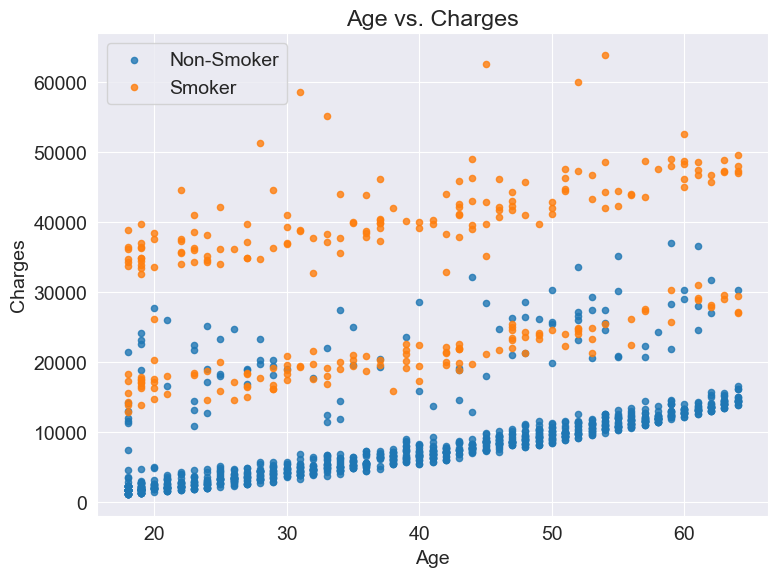

In [15]:
# Split data by smoker status
smoker_yes = medical_df[medical_df['smoker'] == 'yes']
smoker_no = medical_df[medical_df['smoker'] == 'no']

plt.figure(figsize=(8, 6))

plt.scatter(
    smoker_no['age'],
    smoker_no['charges'],
    alpha=0.8,
    s=20,
    label='Non-Smoker'
)

plt.scatter(
    smoker_yes['age'],
    smoker_yes['charges'],
    alpha=0.8,
    s=20,
    label='Smoker'
)

plt.title('Age vs. Charges')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.legend()
plt.tight_layout()
plt.show()

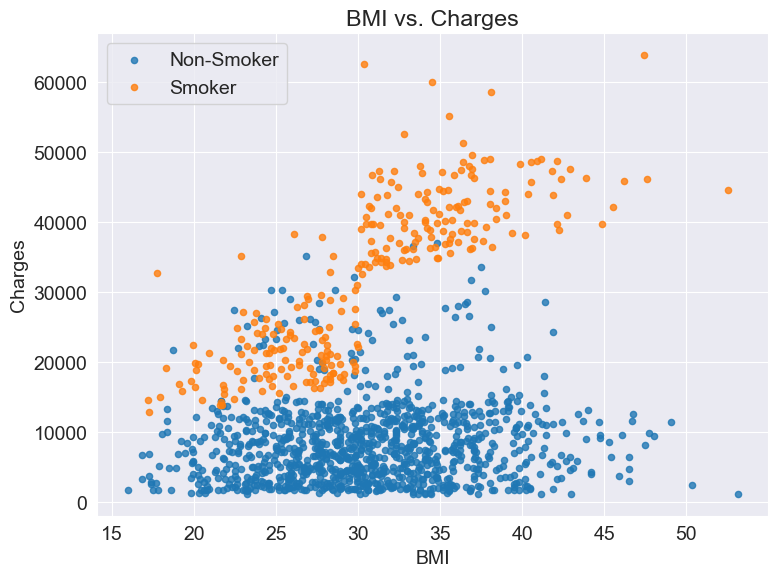

In [16]:

# Split data by smoker status
smoker_yes = medical_df[medical_df['smoker'] == 'yes']
smoker_no = medical_df[medical_df['smoker'] == 'no']

plt.figure(figsize=(8, 6))

plt.scatter(
    smoker_no['bmi'],
    smoker_no['charges'],
    alpha=0.8,
    s=20,
    label='Non-Smoker'
)

plt.scatter(
    smoker_yes['bmi'],
    smoker_yes['charges'],
    alpha=0.8,
    s=20,
    label='Smoker'
)

plt.title('BMI vs. Charges')
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.legend()
plt.tight_layout()
plt.show()

In [17]:
medical_df.charges.corr(medical_df.age)
medical_df.charges.corr(medical_df.bmi)

np.float64(0.19834096883362887)

In [18]:
smoker_values = {'no': 0, 'yes': 1}
smoker_numeric = medical_df.smoker.map(smoker_values)
medical_df.charges.corr(smoker_numeric)

np.float64(0.7872514304984778)

<Figure size 800x500 with 0 Axes>

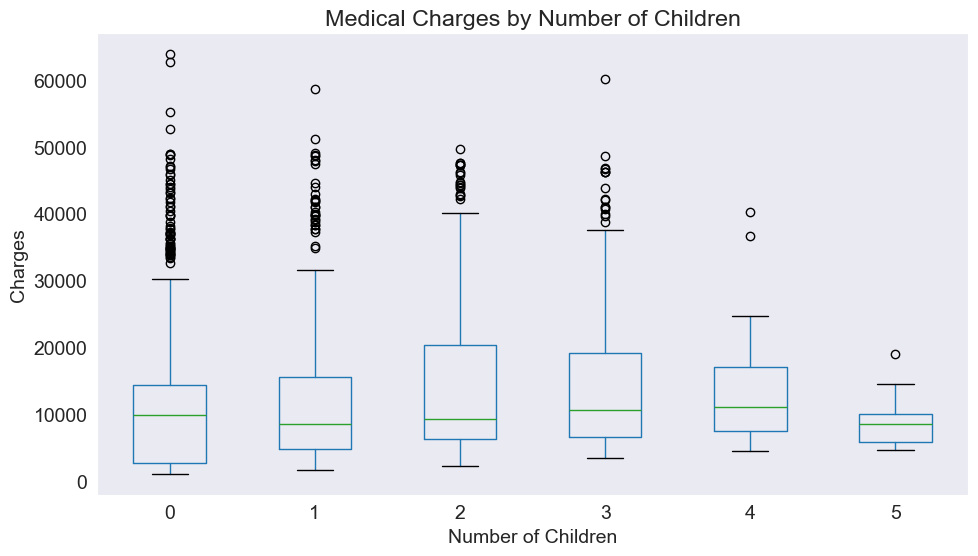

<Figure size 600x500 with 0 Axes>

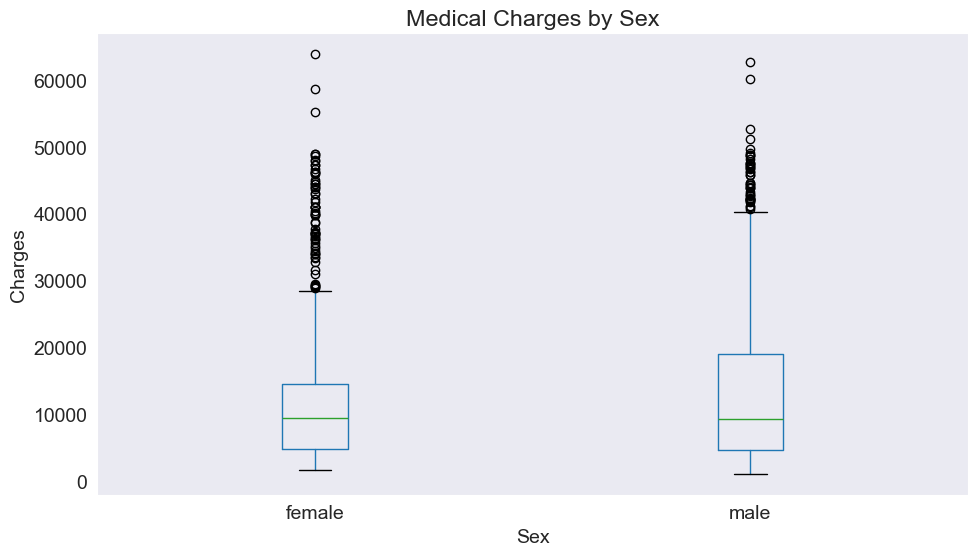

<Figure size 800x500 with 0 Axes>

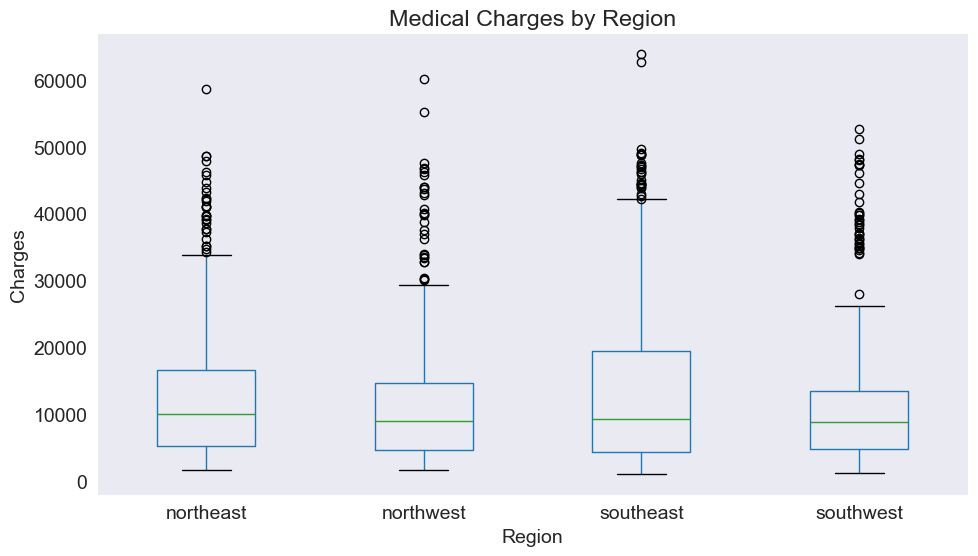

<Figure size 600x500 with 0 Axes>

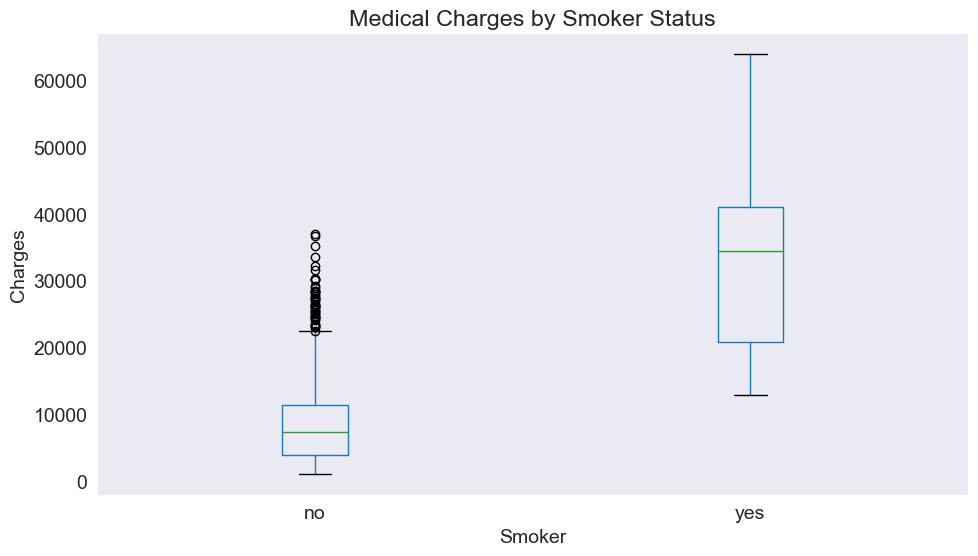

In [19]:
# 1️⃣ Charges vs Children
plt.figure(figsize=(8, 5))
medical_df.boxplot(column='charges', by='children', grid=False)
plt.title('Medical Charges by Number of Children')
plt.suptitle('')
plt.xlabel('Number of Children')
plt.ylabel('Charges')
plt.tight_layout()
plt.show()

# 2️⃣ Charges vs Sex
plt.figure(figsize=(6, 5))
medical_df.boxplot(column='charges', by='sex', grid=False)
plt.title('Medical Charges by Sex')
plt.suptitle('')
plt.xlabel('Sex')
plt.ylabel('Charges')
plt.tight_layout()
plt.show()

# 3️⃣ Charges vs Region
plt.figure(figsize=(8, 5))
medical_df.boxplot(column='charges', by='region', grid=False)
plt.title('Medical Charges by Region')
plt.suptitle('')
plt.xlabel('Region')
plt.ylabel('Charges')
plt.tight_layout()
plt.show()

# 4️⃣ Charges vs Smoker
plt.figure(figsize=(6, 5))
medical_df.boxplot(column='charges', by='smoker', grid=False)
plt.title('Medical Charges by Smoker Status')
plt.suptitle('')
plt.xlabel('Smoker')
plt.ylabel('Charges')
plt.tight_layout()
plt.show()

In [20]:
medical_df.charges.corr(medical_df.age)

np.float64(0.2990081933306478)

In [21]:
medical_df.charges.corr(medical_df.bmi)

np.float64(0.19834096883362887)

In [22]:
smoker_values = {'no': 0, 'yes': 1}
smoker_numeric = medical_df.smoker.map(smoker_values)
medical_df.charges.corr(smoker_numeric)

np.float64(0.7872514304984778)

In [23]:
medical_df.select_dtypes(include='number').corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


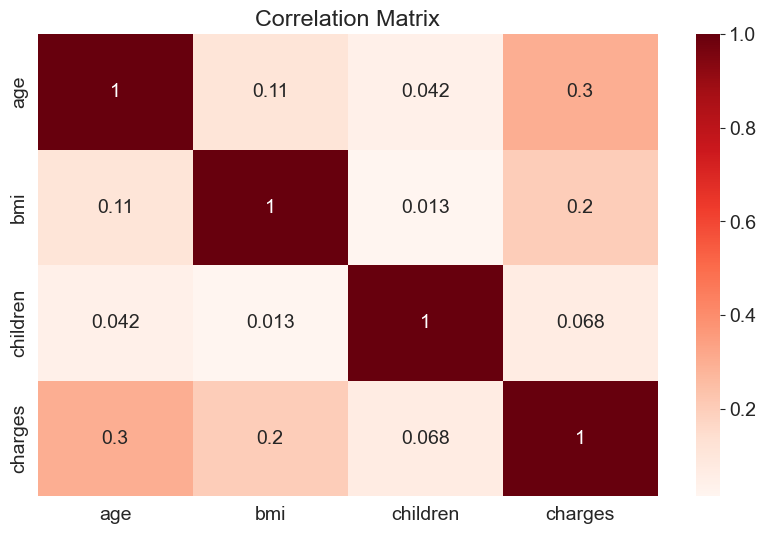

In [24]:
sns.heatmap(medical_df.select_dtypes(include='number').corr(), cmap='Reds', annot=True)
plt.title('Correlation Matrix');